# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

#### Question 1 Answer

In [1]:
# Write the code for your answer here. You can use multiple cells to improve readability.
# -------------------------------- 1a ------------------------------------

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

batchSize = 10
seed = 160238464
scale = 0.2
torch.manual_seed(seed)

transform = transforms.Compose(
            [transforms.ToTensor(),
             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

n_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Lambda(lambda x: x + scale * torch.randn_like(x)),
     transforms.Lambda(lambda x: np.clip(x,0,1))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchSize,
                                          shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchSize,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [2]:
# -------------------------------- 1b ------------------------------------

# generate both training and testing set with noise added on
n_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=n_transform)
n_trainloader = torch.utils.data.DataLoader(n_trainset, batch_size=batchSize,
                                          shuffle=False, num_workers=2)

n_testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=n_transform)
n_testloader = torch.utils.data.DataLoader(n_testset, batch_size=batchSize,
                                         shuffle=False, num_workers=2)

In [3]:
# -------------------------------- 1c ------------------------------------

# generate two empty list, Catdog_idx is for storing the position of which an image is assigned label as cat or dog
# in the original trainset. Catdogtest_idx is for storing the position of which an image is assigned label as cat or dog
# in the original testset.
Catdog_idx = []
Catdogtest_idx = []

# if an image has label cat or dog in trainset, store its position in the list
for i in range(len(trainset)):
    if trainset[i][1] == 3 or trainset[i][1] == 5:
        Catdog_idx = Catdog_idx + [i]

# if an image has label cat or dog in testset, store its position in the list
for i in range(len(testset)):
    if testset[i][1] == 3 or testset[i][1] == 5:
        Catdogtest_idx = Catdogtest_idx + [i]
        
# generate Catdog subset
Catdog = torch.utils.data.Subset(trainset, Catdog_idx)
Catdogloader = torch.utils.data.DataLoader(Catdog, batch_size=batchSize,shuffle=True, num_workers=2)
Catdogtest = torch.utils.data.Subset(testset, Catdogtest_idx)
Catdogtestloader = torch.utils.data.DataLoader(Catdogtest, batch_size=batchSize,shuffle=True, num_workers=2)

# generate Catdog subset with noise
n_Catdog = torch.utils.data.Subset(n_trainset, Catdog_idx)
n_Catdogloader = torch.utils.data.DataLoader(n_Catdog, batch_size=batchSize,shuffle=True, num_workers=2)
n_Catdogtest = torch.utils.data.Subset(n_testset, Catdogtest_idx)
n_Catdogtestloader = torch.utils.data.DataLoader(n_Catdogtest, batch_size=batchSize,shuffle=True, num_workers=2)

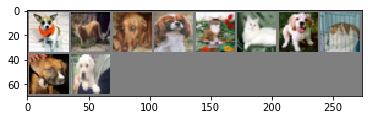

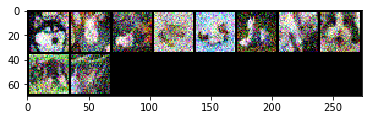

  dog   cat   dog   dog   cat   cat   dog   cat   dog   dog


In [4]:
# -------------------------------- 1d ------------------------------------

def imshow(img):
    img = img / 2 + 0.5 # unnormalize back to range [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #rearrange dimensions to numpy format for disply
    plt.show()

def noisyshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #rearrange dimensions to numpy format for disply
    plt.show()

# get some random training images
dataiter = iter(Catdogloader)
images, labels = dataiter.next() #Get one batch (10 here)

n_detaiter = iter(n_Catdogloader)
n_images, n_labels = n_detaiter.next() #Get one batch (10 here)

# show images
imshow(torchvision.utils.make_grid(images))
noisyshow(torchvision.utils.make_grid(n_images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batchSize)))

### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values ($k_1, k_2, ..., k_7$) for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes Classifiers (NBC): one on the original features (raw pixels), and seven on PCA features with seven different dimensions in 2a, i.e., NBC on $k_1$ PCA features; NBC on $k_2$ PCA features; ..., NBC on $k_7$ PCA features. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


In [5]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score
from sklearn.naive_bayes import GaussianNB

In [6]:
# Write the code for your answer here. You can use multiple cells to improve readability.
# -------------------------------- 2a ------------------------------------

k1 = 10
k2 = 20
k3 = 50
k4 = 100
k5 = 200
k6 = 500
k7 = 1000
k0 = 3072

# renew the catdogloader with a batchsize same as Catdog's length
newSize = len(Catdog)
new_loader = torch.utils.data.DataLoader(Catdog, batch_size=newSize,shuffle=True, num_workers=2)
new_detaiter = iter(new_loader)
x,y = new_detaiter.next()

# reshape x's shape from (10000,3,32,32) to (10000,3072)
h_Catdog,w_Catdog = x.shape[2:]
x_reshape = x.reshape(x.shape[0],x.shape[1],h_Catdog * w_Catdog)
x_Catdog = x_reshape.reshape(x.shape[0],x.shape[1] * h_Catdog * w_Catdog)

# generate 7 Catdog PCA features with 7 different dimensions, k1 to k7 respectively
pca_Catdog1 = PCA(n_components=k1, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)
pca_Catdog2 = PCA(n_components=k2, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)
pca_Catdog3 = PCA(n_components=k3, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)
pca_Catdog4 = PCA(n_components=k4, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)
pca_Catdog5 = PCA(n_components=k5, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)
pca_Catdog6 = PCA(n_components=k6, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)
pca_Catdog7 = PCA(n_components=k7, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)

### Reason for choosing these k values:
i. I want the chosen values to have a wide range, so that the difference between dataset using k1 and dataset using k7 could be obvious.
ii. The separation between each value is different, so that how much the change of k value will influence the image could be observed.

In [7]:
# -------------------------------- 2b ------------------------------------

# generate 8 Naive bayes classifiers, the first one is trained for original Catdog set, the rest are trained 
# for 7 PCA features gathered above
model1 = GaussianNB().fit(x_Catdog,y)
model2 = GaussianNB().fit(pca_Catdog1,y)
model3 = GaussianNB().fit(pca_Catdog2,y)
model4 = GaussianNB().fit(pca_Catdog3,y)
model5 = GaussianNB().fit(pca_Catdog4,y)
model6 = GaussianNB().fit(pca_Catdog5,y)
model7 = GaussianNB().fit(pca_Catdog6,y)
model8 = GaussianNB().fit(pca_Catdog7,y)

### Question 2b explanation:
The Gaussian Naive Bayes classifier will be used, because each feature is a continuous value.

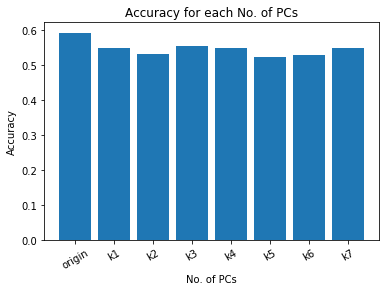

In [8]:
# -------------------------------- 2c ------------------------------------

# renew the Catdogtestloader with a batchsize same as Catdogtest's length
testloader = torch.utils.data.DataLoader(Catdogtest, batch_size=len(Catdogtest),shuffle=True, num_workers=2)
test_detaiter = iter(testloader)
test_x,test_y = test_detaiter.next()

# reshape the Catdogtest set from shape (2000,3,32,32) to (2000,3072)
h,w = test_x.shape[2:]
test_x_reshape = test_x.reshape(test_x.shape[0],test_x.shape[1],h * w)
testX = test_x_reshape.reshape(test_x.shape[0],test_x.shape[1] * h * w)

# generate 7 Catdogtest PCA features with 7 different dimensions, k1 to k7 respectively
pca_test1 = PCA(n_components=k1, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test2 = PCA(n_components=k2, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test3 = PCA(n_components=k3, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test4 = PCA(n_components=k4, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test5 = PCA(n_components=k5, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test6 = PCA(n_components=k6, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test7 = PCA(n_components=k7, svd_solver='randomized', whiten=True).fit_transform(testX)

# apply 8 Naive bayes classifiers to the seven 7 Catdogtest PCA features gathered above and original Catdogtest set
# to predict the labels for each image
pred1 = model1.predict(testX)
pred2 = model2.predict(pca_test1)
pred3 = model3.predict(pca_test2)
pred4 = model4.predict(pca_test3)
pred5 = model5.predict(pca_test4)
pred6 = model6.predict(pca_test5)
pred7 = model7.predict(pca_test6)
pred8 = model8.predict(pca_test7)
prediction = [pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8]

# calculate the accuracy of classification for 8 classifiers
performance1 = accuracy_score(test_y,pred1)
performance2 = accuracy_score(test_y,pred2)
performance3 = accuracy_score(test_y,pred3)
performance4 = accuracy_score(test_y,pred4)
performance5 = accuracy_score(test_y,pred5)
performance6 = accuracy_score(test_y,pred6)
performance7 = accuracy_score(test_y,pred7)
performance8 = accuracy_score(test_y,pred8)
performance = [performance1,performance2,performance3,performance4,performance5,performance6,performance7,performance8]

# plot the bar graph of classification accuracy for each classifier
def plot_bar():
    label = ['origin','k1','k2','k3','k4','k5','k6','k7']
    index = np.arange(len(label))
    plt.bar(index, performance)
    plt.xlabel('No. of PCs', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Accuracy for each No. of PCs')
    plt.show()
plot_bar()

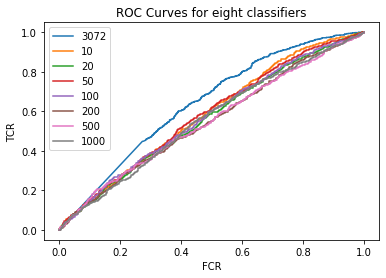

In [9]:
# -------------------------------- 2d ------------------------------------

# calculate the probility of how much an image might belong to which class for each classifier 
prob1 = model1.predict_proba(testX)
prob2 = model2.predict_proba(pca_test1)
prob3 = model3.predict_proba(pca_test2)
prob4 = model4.predict_proba(pca_test3)
prob5 = model5.predict_proba(pca_test4)
prob6 = model6.predict_proba(pca_test5)
prob7 = model7.predict_proba(pca_test6)
prob8 = model8.predict_proba(pca_test7)
probability = [prob1,prob2,prob3,prob4,prob5,prob6,prob7,prob8]

# calculate the TPR and FPR value for each classifier
TPR_list = []
FPR_list = []
for i in range(len(probability)):
    TPR,FPR,threshold = roc_curve(test_y.numpy(), probability[i][:,0],pos_label=5)
    TPR_list = TPR_list + [TPR]
    FPR_list = FPR_list + [FPR]
    
# plot the line graph of ROC curve for 8 classifiers
def plot_line():
    k = ['3072','10','20','50','100','200','500','1000']
    for i in range(len(TPR_list)):
        plt.plot(FPR_list[i], TPR_list[i],label = k[i])
    plt.title('ROC Curves for eight classifiers')
    plt.xlabel('FCR')
    plt.ylabel('TCR')
    plt.legend()
    plt.show()
plot_line()

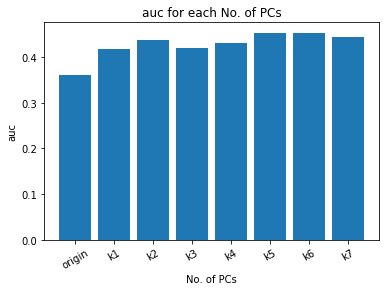

In [10]:
# -------------------------------- 2e ------------------------------------

# calculate the area under the ROC curves values for each classifier
auc = []
for i in range(len(probability)):
    auc = auc + [roc_auc_score(test_y.numpy(), probability[i][:,0])]

# plot the bar graph of auc values for each classifier
def plot_another_bar():
    label = ['origin','k1','k2','k3','k4','k5','k6','k7']
    index = np.arange(len(label))
    plt.bar(index, auc)
    plt.xlabel('No. of PCs', fontsize=10)
    plt.ylabel('auc', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('auc for each No. of PCs')
    plt.show()
    
plot_another_bar()

### Question 2f:
i. The value of auc is inversely proportional to the value of the classification accuracy of each PC. For the class of using original number of PCs, the auc value calculated for it is the lowest compared to all the others. But the classification accuracy calculated for it is the highest.
ii. The classification accuracy for class using 10 PCs and class using 1000 PCs are close. The accuracy that is improved is more from k2 to k3 than the decline from k3 to k4. Which means the best number of PCs that should be chosen is in the range of [k3,k4].  
iii. For the ROC graph, when FPR is from 0 to approximately 0.38, TPRs are very close for each k. From 0.38 to approximately 0.58, the red line which stands for k3 has the best TPR. From 0.58 to 1, the orange line whicn stands for k1 has the best TPR.

### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on PCA features with three different dimensions in 3b); **four Logistic Regression** classifiers (one on the original features, and three on PCA features with three different dimensions in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [11]:
import time
from sklearn.linear_model import LogisticRegression
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
# Write the code for your answer here. You can use multiple cells to improve readability.
# -------------------------------- 3a ------------------------------------

# renew the n_Catdogloader with a batchsize same as Catdog's length
new_loader = torch.utils.data.DataLoader(n_Catdog, batch_size=newSize,shuffle=True, num_workers=2)
new_detaiter = iter(new_loader)
x,y = new_detaiter.next()

# reshape x's shape from (10000,3,32,32) to (10000,3072)
h_Catdog,w_Catdog = x.shape[2:]
x_reshape = x.reshape(x.shape[0],x.shape[1],h_Catdog * w_Catdog)
x_Catdog = x_reshape.reshape(x.shape[0],x.shape[1] * h_Catdog * w_Catdog)

# generate 7 n_Catdog PCA features with 7 different dimensions, k1 to k7 respectively
pca_Catdog1 = PCA(n_components=k1, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)
pca_Catdog2 = PCA(n_components=k2, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)
pca_Catdog3 = PCA(n_components=k3, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)
pca_Catdog4 = PCA(n_components=k4, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)
pca_Catdog5 = PCA(n_components=k5, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)
pca_Catdog6 = PCA(n_components=k6, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)
pca_Catdog7 = PCA(n_components=k7, svd_solver='randomized', whiten=True).fit_transform(x_Catdog)

In [13]:
# generate 8 Naive bayes classifiers, the first one is trained for original n_Catdog set, the rest are trained 
# for 7 PCA features gathered above

model1 = GaussianNB().fit(x_Catdog,y)
model2 = GaussianNB().fit(pca_Catdog1,y)
model3 = GaussianNB().fit(pca_Catdog2,y)
model4 = GaussianNB().fit(pca_Catdog3,y)
model5 = GaussianNB().fit(pca_Catdog4,y)
model6 = GaussianNB().fit(pca_Catdog5,y)
model7 = GaussianNB().fit(pca_Catdog6,y)
model8 = GaussianNB().fit(pca_Catdog7,y)

In [14]:
# renew the n_Catdogtestloader with a batchsize same as Catdogtest's length
testloader = torch.utils.data.DataLoader(n_Catdogtest, batch_size=len(n_Catdogtest),shuffle=True, num_workers=2)
test_detaiter = iter(testloader)
test_x,test_y = test_detaiter.next()

# reshape test_x's shape from (2000,3,32,32) to (2000,3072)
h,w = test_x.shape[2:]
test_x_reshape = test_x.reshape(test_x.shape[0],test_x.shape[1],h * w)
testX = test_x_reshape.reshape(test_x.shape[0],test_x.shape[1] * h * w)

# generate 7 n_Catdogtest PCA features with 7 different dimensions, k1 to k7 respectively
pca_test1 = PCA(n_components=k1, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test2 = PCA(n_components=k2, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test3 = PCA(n_components=k3, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test4 = PCA(n_components=k4, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test5 = PCA(n_components=k5, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test6 = PCA(n_components=k6, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test7 = PCA(n_components=k7, svd_solver='randomized', whiten=True).fit_transform(testX)

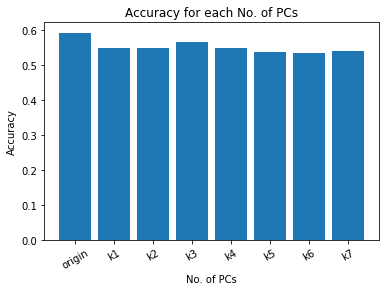

In [15]:
# apply 8 Naive bayes classifiers to the seven 7 Catdogtest PCA features gathered above and original n_Catdogtest set
# to predict the labels for each image
pred1 = model1.predict(testX)
pred2 = model2.predict(pca_test1)
pred3 = model3.predict(pca_test2)
pred4 = model4.predict(pca_test3)
pred5 = model5.predict(pca_test4)
pred6 = model6.predict(pca_test5)
pred7 = model7.predict(pca_test6)
pred8 = model8.predict(pca_test7)
prediction = [pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8]

# calculate the accuracy of classification for 8 classifiers
performance1 = accuracy_score(test_y,pred1)
performance2 = accuracy_score(test_y,pred2)
performance3 = accuracy_score(test_y,pred3)
performance4 = accuracy_score(test_y,pred4)
performance5 = accuracy_score(test_y,pred5)
performance6 = accuracy_score(test_y,pred6)
performance7 = accuracy_score(test_y,pred7)
performance8 = accuracy_score(test_y,pred8)
performance = [performance1,performance2,performance3,performance4,performance5,performance6,performance7,performance8]

# plot the bar graph of classification accuracy for each classifier
plot_bar()

In [16]:
# -------------------------------- 3b ------------------------------------

k1 = 100
k2 = 1000
k3 = 2500

# renew the trainloader with a batchsize same as trainset's length
newSize = len(trainset)
new_loader = torch.utils.data.DataLoader(trainset, batch_size=newSize,shuffle=True, num_workers=2)
new_detaiter = iter(new_loader)
x,y = new_detaiter.next()

# reshape x's shape from (50000,3,32,32) to (50000,3072)
h_train,w_train = x.shape[2:]
x_reshape = x.reshape(x.shape[0],x.shape[1],h_train * w_train)
x_train = x_reshape.reshape(x.shape[0],x.shape[1] * h_train * w_train)

# generate 3 trainset PCA features with 3 different dimensions, k1 to k3 respectively
pca_train1 = PCA(n_components=k1, svd_solver='randomized', whiten=True).fit_transform(x_train)
pca_train2 = PCA(n_components=k2, svd_solver='randomized', whiten=True).fit_transform(x_train)
pca_train3 = PCA(n_components=k3, svd_solver='randomized', whiten=True).fit_transform(x_train)
pca_train = [x_train, pca_train1, pca_train2, pca_train3]

### Question 3b explanation:
Reason for choosing these k values: i. I want the chosen values to have a wide range, so that the difference between dataset using k1 and dataset using k3 could be obvious. ii. The separation between each value is different, so that how much the change of k value will influence the image could be observed. iii. As a result of the observation in above sections, the best k value is located in between the old k3 and k4, so I choose k1 as a number close to that range.

In [17]:
# -------------------------------- 3c ------------------------------------

# renew the testloader with a batchsize same as testset's length
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset),shuffle=True, num_workers=2)
test_detaiter = iter(testloader)
test_x,test_y = test_detaiter.next()

# reshape test_x's shape from (10000,3,32,32) to (10000,3072)
h,w = test_x.shape[2:]
test_x_reshape = test_x.reshape(test_x.shape[0],test_x.shape[1],h * w)
testX = test_x_reshape.reshape(test_x.shape[0],test_x.shape[1] * h * w)

# generate 3 testset PCA features with 3 different dimensions, k1 to k3 respectively
pca_test1 = PCA(n_components=k1, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test2 = PCA(n_components=k2, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test3 = PCA(n_components=k3, svd_solver='randomized', whiten=True).fit_transform(testX)
pca_test = [testX, pca_test1, pca_test2, pca_test3]

In [18]:
# generate 4 Naive bayes classifiers, the first one is trained for original testset, the rest are trained 
# for 3 PCA features gathered above
model = []
nbc_train_time = []
for i in range(len(pca_train)):
    start = time.time()
    model += [GaussianNB().fit(pca_train[i],y)]
    stop = time.time()
    t = stop - start
    nbc_train_time += [t]
    

In [19]:
# generate 4 logistic regression classifiers, one is trained for the original trainset, the other three are trained
# for 3 trainset PCA features gathered above
clf1 = LogisticRegression(solver='lbfgs',max_iter=3500,multi_class = 'multinomial')
clf2 = LogisticRegression(solver='lbfgs',max_iter=1500,multi_class = 'multinomial')

# train the classifier for the original trainset
lrc_train_start1 = time.time()
lrc1 = clf1.fit(x_train, y)
lrc_train_stop1 = time.time()
lrc_train_time1 = lrc_train_stop1 - lrc_train_start1

# train the rest 3 classifiers
lrc_train = [lrc1]
lrc_test = []
lrc_train_time = [lrc_train_time1]
lrc_test_time = []
for i in range(len(pca_train)-1):
    start = time.time()
    lrc_train += [LogisticRegression(solver='lbfgs',max_iter=1500,multi_class = 'multinomial').fit(pca_train[i+1],y)]
    stop = time.time()
    t = stop - start
    lrc_train_time += [t]

# apply 4 classifiers which are already trained on corresponding testset, to give the predict of labels
for i in range(len(pca_test)):
    start = time.time()
    lrc_test += [lrc_train[i].predict(pca_test[i])]
    stop = time.time()
    t = stop - start
    lrc_test_time += [t]


In [20]:
# initialise the cnn classifier

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #3: #input channels; 6: #output channels; 5: kernel size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [21]:
# ------------------------------------------ 3d ----------------------------------------------

# apply 4 nbc classifiers which are already trained on corresponding testset, to give the predict of labels
nbc_pred = []
nbc_test_time = []
for i in range(len(model)):
    start = time.time()
    nbc_pred += [model[i].predict(pca_test[i])]
    stop = time.time()
    t = stop - start
    nbc_test_time += [t]
    
# calculate the classification accuracy for the 4 nbc classifiers
nbc_performance = []
for i in range(len(nbc_pred)):
    nbc_performance += [accuracy_score(test_y,nbc_pred[i])]
    

# use the prediction made by logistic regression classifier to calculate the accuracy
lrc_performance = []
for i in range(len(lrc_test)):
    lrc_performance += [accuracy_score(test_y,lrc_test[i])]


In [22]:
# use CNN classifier to classify the label of the test data 

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [23]:
# train the network
max_epochs=2
start = time.time()
for epoch in range(max_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

stop = time.time()
cnn_train_time = stop - start
print('Finished Training')

[1,  2000] loss: 2.214
[1,  4000] loss: 1.799
[2,  2000] loss: 1.546
[2,  4000] loss: 1.442
Finished Training


In [24]:
# The outputs are energies for the 10 classes.
outputs = net(test_x)

# test the results of cnn classifier by calculating the classification accuracy on testset
correct = 0
total = 0
start = time.time()
with torch.no_grad():  #testing phase, no need to compute the gradients to save time
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

stop = time.time()
cnn_test_time = stop - start
acc = correct / total

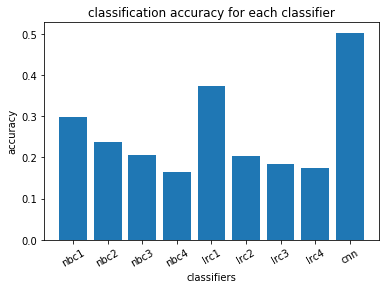

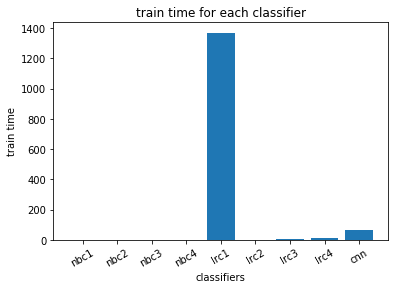

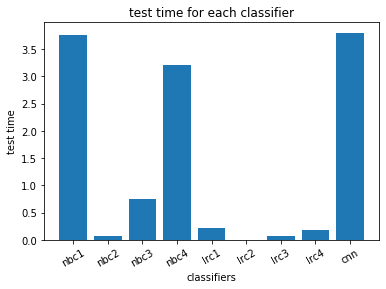

In [25]:
# store the accuracy calculated for 9 classifiers together
performance = nbc_performance + lrc_performance + [acc]

# store the training runtime for 9 classifiers together
train_time = nbc_train_time + lrc_train_time + [cnn_train_time]

# store the testing runtime for 9 classifiers together
test_time = nbc_test_time + lrc_test_time + [cnn_test_time]

# plot the bar graph of the classification accuracy for 9 classifiers
def plot_accuracy():
    label = ['nbc1','nbc2','nbc3','nbc4','lrc1','lrc2','lrc3','lrc4','cnn']
    index = np.arange(len(label))
    plt.bar(index, performance)
    plt.xlabel('classifiers', fontsize=10)
    plt.ylabel('accuracy', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('classification accuracy for each classifier')
    plt.show()

# plot the bar graph of the training runtime for 9 classifiers
def plot_train_time():
    label = ['nbc1','nbc2','nbc3','nbc4','lrc1','lrc2','lrc3','lrc4','cnn']
    index = np.arange(len(label))
    plt.bar(index, train_time)
    plt.xlabel('classifiers', fontsize=10)
    plt.ylabel('train time', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('train time for each classifier')
    plt.show()

# plot the bar graph of the testing runtime for 9 classifiers
def plot_test_time():
    label = ['nbc1','nbc2','nbc3','nbc4','lrc1','lrc2','lrc3','lrc4','cnn']
    index = np.arange(len(label))
    plt.bar(index, test_time)
    plt.xlabel('classifiers', fontsize=10)
    plt.ylabel('test time', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('test time for each classifier')
    plt.show()
    
plot_accuracy()
plot_train_time()
plot_test_time()

Text(91.68, 0.5, 'predicted label')

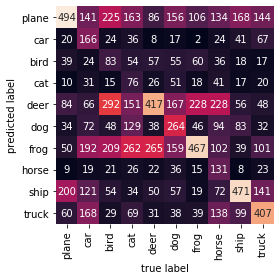

In [26]:
# ------------------------------------------- 3e ---------------------------------------------

# confusion matrix for nbc applied on original testset

mat1 = confusion_matrix(test_y, nbc_pred[0])
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

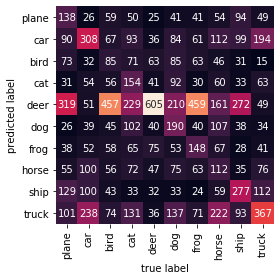

In [27]:
# confusion matrix for nbc applied on testset with k1 = 100 dimensions

mat2 = confusion_matrix(test_y, nbc_pred[1])
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

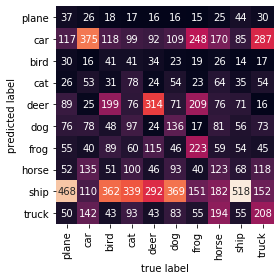

In [28]:
# confusion matrix for nbc applied on testset with k2 = 1000 dimensions

mat3 = confusion_matrix(test_y, nbc_pred[2])
sns.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

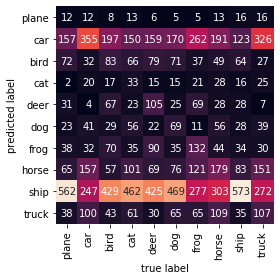

In [29]:
# confusion matrix for nbc applied on testset with k3 = 2500 dimensions

mat4 = confusion_matrix(test_y, nbc_pred[3])
sns.heatmap(mat4.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

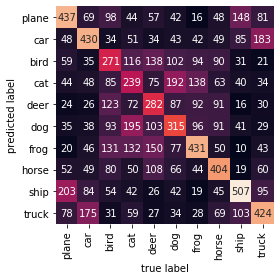

In [30]:
# confusion matrix for logistic regression classifier applied on original testset

mat5 = confusion_matrix(test_y, lrc_test[0])
sns.heatmap(mat5.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

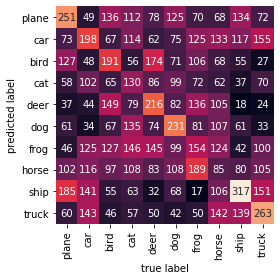

In [31]:
# confusion matrix for logistic regression classifier applied on testset with k1 = 100 dimensions

mat6 = confusion_matrix(test_y, lrc_test[1])
sns.heatmap(mat6.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

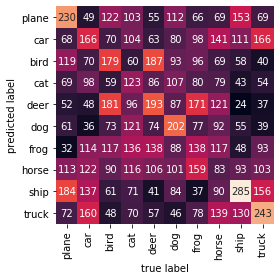

In [32]:
# confusion matrix for logistic regression classifier applied on testset with k2 = 1000 dimensions

mat7 = confusion_matrix(test_y, lrc_test[2])
sns.heatmap(mat7.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

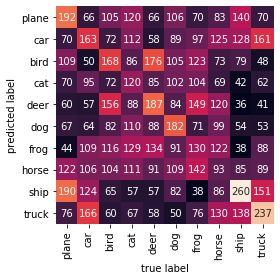

In [33]:
# confusion matrix for logistic regression classifier applied on testset with k3 = 2500 dimensions

mat8 = confusion_matrix(test_y, lrc_test[3])
sns.heatmap(mat8.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

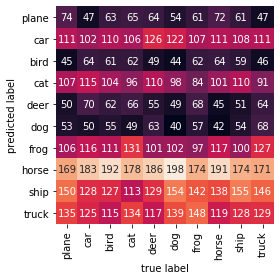

In [34]:
# confusion matrix for cnn applied on original testset

mat9 = confusion_matrix(test_y, predicted)
sns.heatmap(mat9.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Question 3f: 
i. The training time for the first logistic regression classifier which appling on the original testset is much more than the other classifiers take. It takes around 1600 seconds while the others only take a few seconds. The cnn classifer takes second long time, which is around 11 seconds.
ii. CNN classifier get the best classification accuracy within the three kinds of classifers. The overall results gathered by NBCs are better than the overall results gathered by Logistic regression classifiers. Yet the results gathered by NBC which applied on the original testset is worse than the results gathered by Logistic regression classifier which applied on the original testset.
iii. Logistic regression classifiers take the shortest testing time in overall. The first nbc which applied on the original testset takes the longest time on testing within the 9 classifiers. The fourth nbc which applied on the testset with 2500 dimensions takes nearly the same time as the time cnn classifier takes.

### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [35]:
# Write the code for your answer here. You can use multiple cells to improve readability.

# ---------------------------------------- 4a -------------------------------------------

# rewrite the structure of the autoencoder class and initialise it
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 3 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
myAE=Autoencoder()

In [36]:
# ---------------------------------------- 4b -------------------------------------------

#Hyperparameters for training
batch_size=len(n_trainset)
learning_rate=0.05
max_epochs = 20 

#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.SGD(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shffling)
n_trainloader = torch.utils.data.DataLoader(n_trainset, batch_size=batch_size, shuffle=True, num_workers=2)
#Storage
outputs = []

#Start training the autoencoder for noisy training images
for epoch in range(max_epochs):
    for data in n_trainloader:
        img, label = data
        optimizer.zero_grad()
        recon = myAE(img)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()            
    if (epoch % 2) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, img, recon),)

Epoch:1, Loss:0.0863
Epoch:3, Loss:0.0863
Epoch:5, Loss:0.0863
Epoch:7, Loss:0.0863
Epoch:9, Loss:0.0863
Epoch:11, Loss:0.0863
Epoch:13, Loss:0.0863
Epoch:15, Loss:0.0863
Epoch:17, Loss:0.0863
Epoch:19, Loss:0.0863
